## Lab Objectives

Connected Components Labeling, Object Detection, Template Matching, HOG, SVM

## Import libraries, download images

In [23]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time
import cv2
import wget
import urllib

In [24]:
!wget "https://studyingprayer.files.wordpress.com/2013/12/004.jpg" -O birds.png
!wget https://pics.utro.ru/utro_photos/2018/07/09/1366657.jpg -O football.jpg
!wget "https://github.com/spmallick/learnopencv/blob/master/digits-classification/digits.png?raw=true" -O digits.png
!wget https://pancreapedia.org/sites/default/files/Figure%205a%20-%20CT%20versus%20MRI%20in%20acute%20pancreatitis.jpg -O stomach.jpg
!wget http://www.defunctgames.com/pic/level1-smb1d.jpg -O mario.jpg
!wget https://docs.opencv.org/master/water_coins.jpg -O coins.jpg
!wget https://docs.adaptive-vision.com/4.7/studio/img/machine_vision_guide/template_matching/mount.png -O mount.jpg
!wget https://docs.adaptive-vision.com/4.7/studio/img/machine_vision_guide/template_matching/mounts.png -O mounts.jpg
clear_output()

AttributeError: module 'urllib' has no attribute 'urlretrieve'

## Helper functions

In [14]:
# funcrion to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

 
# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]
    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

## Checkout downloaded images

In [8]:
stomach, football = read_and_resize('stomach.jpg'), read_and_resize('football.jpg')
mario, coins = read_and_resize('mario.jpg'), read_and_resize('coins.jpg')
showInRow([stomach, football, mario, coins])

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## Connected components

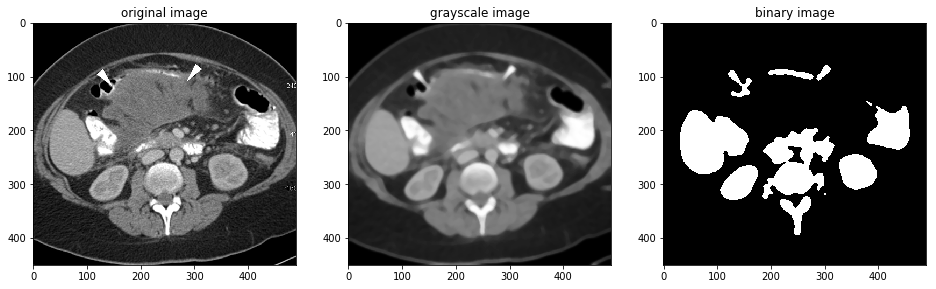

In [0]:
#@title Connected components { run: "auto" }
thresh_val = 130 #@param {type:"slider", min:0, max:255, step:1}

stomach_gray = cv2.cvtColor(stomach, cv2.COLOR_BGR2GRAY)
stomach_gray = cv2.GaussianBlur(stomach_gray,(11,11),0)
stomach_gray = cv2.medianBlur(stomach_gray,9)

# Thresholding
ret,stomach_bw = cv2.threshold(stomach_gray,thresh_val,255,cv2.THRESH_BINARY)

showInRow([stomach, stomach_gray, stomach_bw], ['original image', 'grayscale image', 'binary image'])

labels type is <class 'numpy.ndarray'>
labels shape is (451, 489)
number of labels is 12
centroids coordinates 
 [[247.95898446 221.87111483]
 [298.63276836  93.25706215]
 [142.4567757  116.43107477]
 [238.90942928  95.45533499]
 [382.68085106 150.08510638]
 [423.64220975 198.72485973]
 [ 86.49551783 222.01201602]
 [247.71483683 260.79543322]
 [361.00194932 277.19632414]
 [142.20396233 298.51835011]
 [300.5        319.        ]
 [248.3028928  351.03516733]]
[[     0      0    489    451 185320]
 [   285     80     27     29    354]
 [   121     89     44     51    856]
 [   195     88     85     19    806]
 [   378    146     10      9     47]
 [   379    155     80     82   4634]
 [    31    164    128    119  10486]
 [   185    197    134    132   9591]
 [   327    245     71     66   3591]
 [   106    266     71     65   3079]
 [   299    318      4      3     12]
 [   217    323     59     73   1763]]
Connected components parameters:
labeled component 0
most left coordinate 0
most 

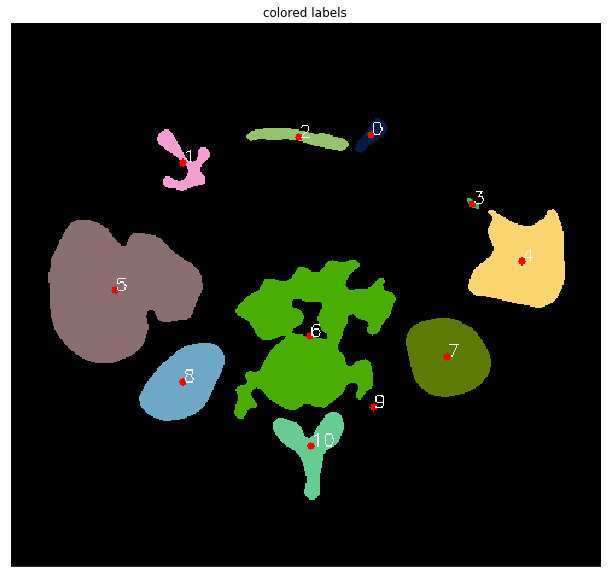

In [0]:
connectivity=4
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(stomach_bw, connectivity, cv2.CV_32S)

print('labels type is {}'.format(type(labels)))
print('labels shape is {}'.format(labels.shape))
print('number of labels is {}'.format(n_labels))
print('centroids coordinates \n {}'.format(centroids))
print(stats)


colors = generate_colors(n_labels)

labeled_image = np.zeros((stomach_bw.shape[0],stomach_bw.shape[1],3), dtype=np.uint8)

print('Connected components parameters:')
print('================================================')

# loop over all components and determine if it is a number
for (i, label) in enumerate(range(1, n_labels)):

    labeled_image[labels == label,:]= colors[i]
    # centroid coordinates
    cent_x, cent_y = int(centroids[i+1,0]), int(centroids[i+1,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 3, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)
    
    print('labeled component {}'.format(i))
    print('most left coordinate {}'.format(stats[i, cv2.CC_STAT_LEFT]))
    print('most top {}'.format(stats[i, cv2.CC_STAT_TOP ]))
    print('cc width {}'.format(stats[i, cv2.CC_STAT_WIDTH]))
    print('cc height {}'.format(stats[i, cv2.CC_STAT_HEIGHT ]))
    print('cc area {}'.format(stats[i, cv2.CC_STAT_AREA]))
    print('================================================')
    

plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

### Highlight components on the source image

The number of organs on image is equal to: 11


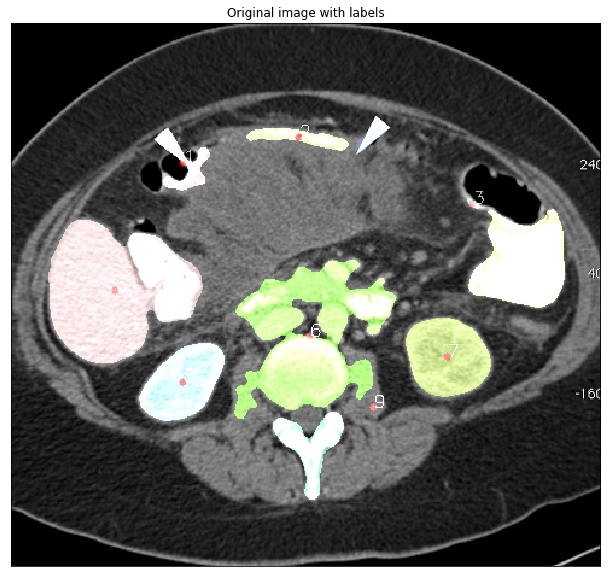

In [0]:
print('The number of organs on image is equal to: {}'.format(n_labels-1))
image_with_labels = cv2.addWeighted(stomach,1,labeled_image,0.7,0)
plt.title('Original image with labels')
plt.xticks([]),plt.yticks([])
plt.imshow(image_with_labels)
plt.show()

## Exercise: Calculate number of coins

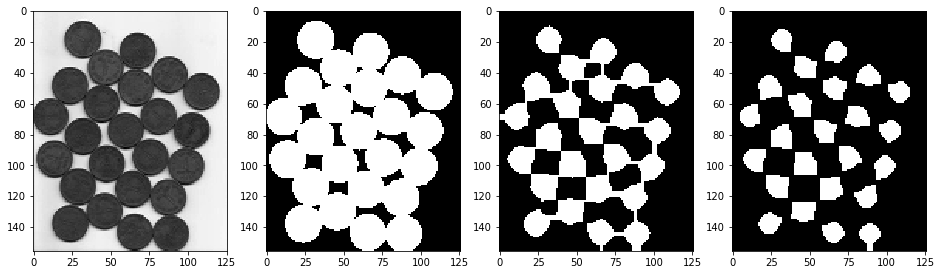

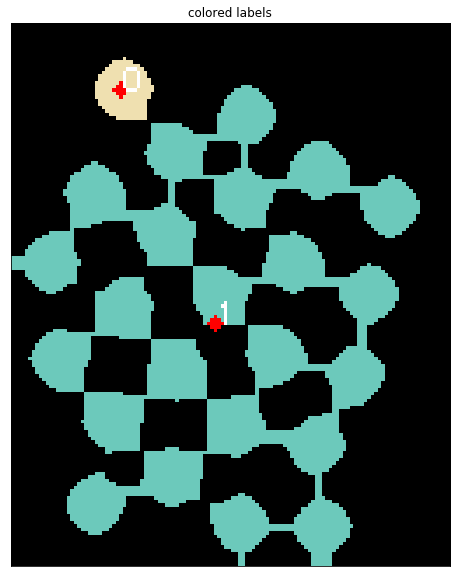

In [0]:
img_gray = read_and_resize('coins.jpg', grayscale = True)

ret, img_gray_bw = cv2.threshold(img_gray,220,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((7,7), np.uint8)
erosion = cv2.erode(img_gray_bw, kernel, iterations = 1)
# dilation = cv2.dilate(erosion, kernel, iterations = 1)

showInRow([img_gray, img_gray_bw, erosion, dilation])

# CONNECTED COMPONENTS

connectivity=8
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(erosion, connectivity, cv2.CV_32S)

colors = generate_colors(n_labels)
labeled_image = np.zeros((img_gray_bw.shape[0],img_gray_bw.shape[1],3), dtype=np.uint8)


for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label,:]= colors[i]
    cent_x, cent_y = int(centroids[i+1,0]), int(centroids[i+1,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 2, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,(255,255,255),1)
    

plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

## Template matching

**Available methods OpenCV:**  

***CV_TM_SQDIFF***

$$R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2$$

***CV_TM_SQDIFF_NORMED***

$$R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}$$

***CV_TM_CCORR***

$$R(x,y)= \sum _{x',y'} (T(x',y')  \cdot I(x+x',y+y'))$$
  
***CV_TM_CCORR_NORMED***

$$R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}$$

***CV_TM_CCOEFF***

$$R(x,y)= \sum _{x',y'} (T'(x',y')  \cdot I(x+x',y+y'))$$

where

$$\begin{array}{l} T'(x',y')=T(x',y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} I(x+x'',y+y'') \end{array}$$

***CV_TM_CCOEFF_NORMED***

$$R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} }$$


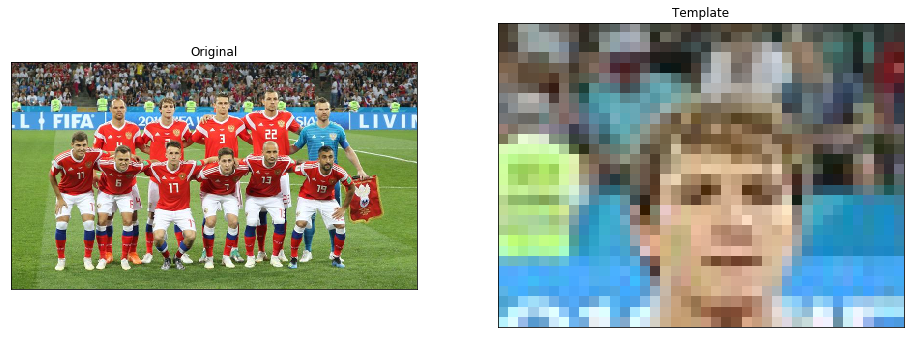

In [0]:
img_template = football[30:60,140:180]
plt.rcParams["figure.figsize"] = (16, 10)
showInRow([football, img_template], ["Original", "Template"], True)

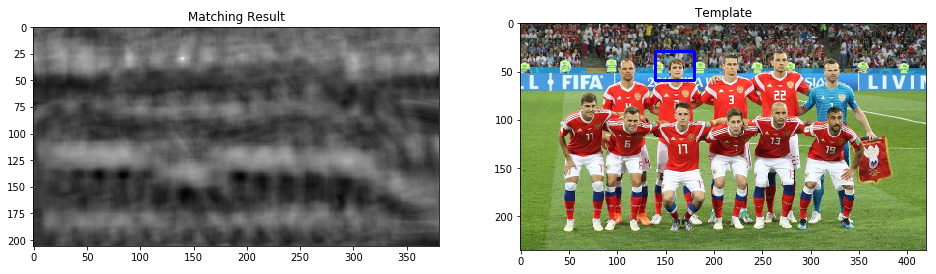

In [0]:
#@title Template matching threshold { run: "auto" }
threshold = 0.94 #@param {type:"slider", min:0, max:1, step:0.01}

methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
           'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
           'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}


method = "TM_CCOEFF_NORMED" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

img_detected = football.copy()
h, w, c = img_template.shape
res = cv2.matchTemplate(football,img_template,methods[method])

if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
  loc = np.where( res <= threshold)
else: 
  loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_detected, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

  
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
# if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
#     top_left = min_loc
# else:
#     top_left = max_loc
# bottom_right = (top_left[0] + w, top_left[1] + h)

# cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)
    
    
showInRow([res, img_detected], ['Matching Result', 'Template'])    

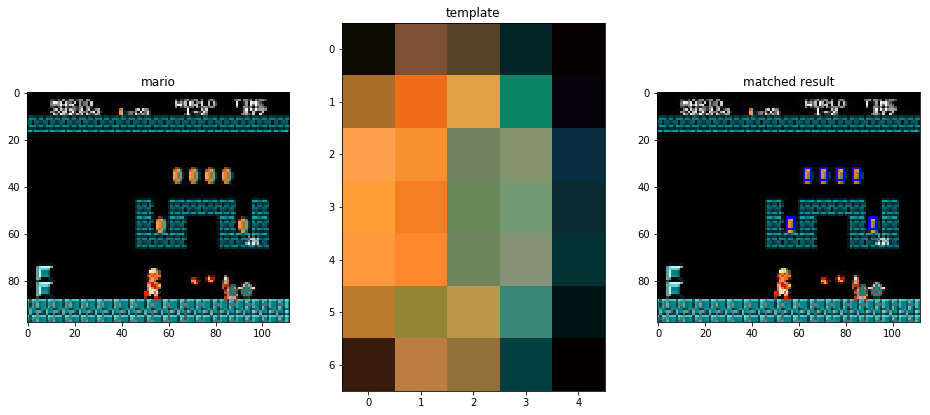

In [0]:
template = mario[32:39,62:67]
w, h, c = template.shape[::-1]
result = mario.copy()
res = cv2.matchTemplate(mario,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(result, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

showInRow([mario, template, result], ['mario', 'template', 'matched result'])

### Usage of template matching:

1. Rotation invariant matching. We prepare 360 template images and run for each template matching<br>
![alt text](https://drive.google.com/uc?export=view&id=1V6qDMuc1kY-kNaKWf3iQ8u4cadms11bY)
2. Tracking of object without shape change<br>
![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S111001681730203X-gr9.jpg)
3. Find the same objects of the scene

## Histogram of oriented gradients (HOG) and SVM

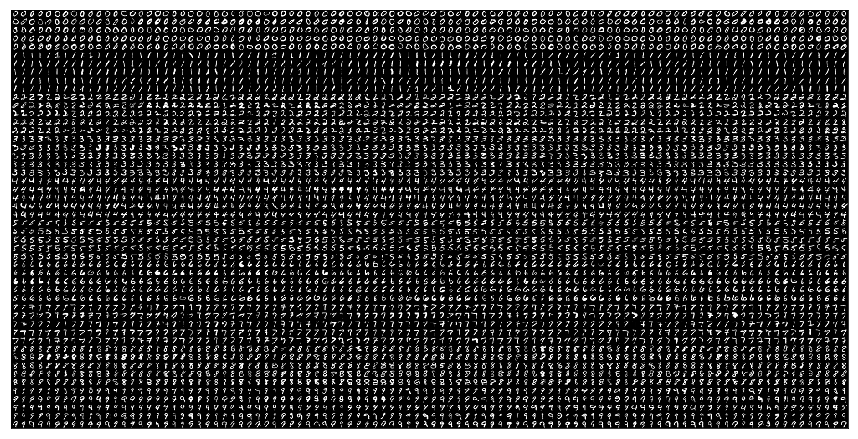

(500, 1000)


In [0]:
img_digits = read_and_resize('digits.png', grayscale = True)
fig = plt.figure(figsize=(15, 15))
plt.imshow(img_digits, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()
print(img_digits.shape)

## Exercise: Train SVM classificator on handwritten digits and recognize number on key tag

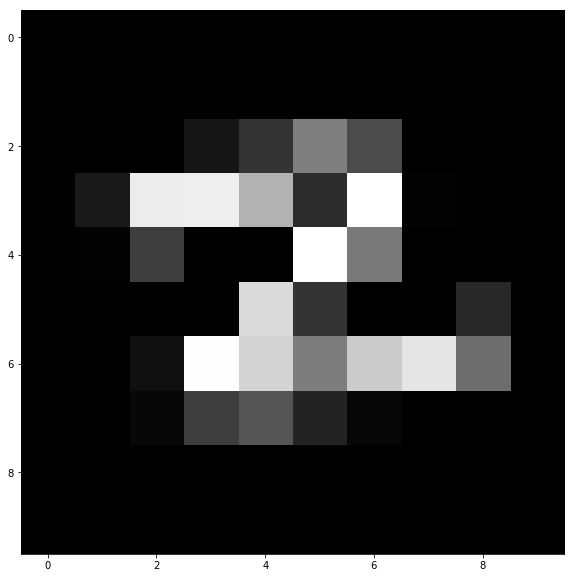

In [0]:
# SPLIT DATA
cells = [np.hsplit(row,100) for row in np.vsplit(img_digits,50)]

# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]

showInRow([train_cells[10][10]])

## Exercise: Implement HOG function using [this tutorial](https://www.learnopencv.com/histogram-of-oriented-gradients/)

In [0]:
def hog(img, group_size = 5, step = 2, bin_n = 16):
  # calculate gradient, sobel operator
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  # calculate magnitude and angle using cv2.cartToPolar
  mag, ang = cv2.cartToPolar(gx, gy)
  # fill bins of each of 4 histograms 
  bins = ?    # quantizing binvalues in (0...16)
      
  # stack 4 histograms together and normalize
  hists = ?
  hist = np.hstack(hists)     # hist is a 64 bit vector
  return hist

hog(train_cells[10][10]).shape

(400,)

In [0]:

######     Now training      ########################

hogdata = [list(map(hog,row)) for row in train_cells]
trainData = np.float32(hogdata)
trainData = trainData.reshape(-1, trainData.shape[2])
print(trainData.shape)
responses = np.float32(np.repeat(np.arange(10),250)[:,np.newaxis]).astype(int)

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(trainData, cv2.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')

######     Now testing      ########################

hogdata = [list(map(hog,row)) for row in test_cells]
testData = np.float32(hogdata)
testData = testData.reshape(-1, testData.shape[2])
result = svm.predict(testData)[1]
# print(result[1].shape)

# #######   Check Accuracy   ########################
mask = result==responses
correct = np.count_nonzero(mask)
print (correct*100.0/result.size) 

(2500, 400)
91.4


## References

HOG features explanation: [link](https://www.learnopencv.com/histogram-of-oriented-gradients/)  
HOG for car logo recognition: [link](https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/)  
Handwritten digits classification using HOG: [link](https://www.learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/)
OCR of Hand-written Data using SVM : [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_opencv/py_svm_opencv.html)

Handwritten Digits Classification : [link](https://github.com/spmallick/learnopencv/blob/master/digits-classification/common.py)